In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set_style('dark')
df = pd.read_excel("C:\\Users\\CWC\\GEOsystems\\BidAssist\\Tenders\\New data to concatenate\\13 Cities.xlsx")
df.head(3)

,Description,Authority,Stage,Contract Date,Contract Amount,City,URL,Tender_ID,numeric_amount,State,Categories
0,Construction For Cc Drain And Related Work Fro...,Rural Development Department,Financial Evaluation,2 Nov 2023,₹ 4.3 Lac,Washim,https://bidassist.com/tender-results/all-tende...,2023_WASHI_937926_2,430000,Maharashtra,Drainage Work
1,Providing Materiles For Construction Of Cement...,Rural Development Department,Financial Evaluation,2 Nov 2023,₹ 6.7 K,Yavatmal,https://bidassist.com/tender-results/all-tende...,2023_YAVAT_954440_2,6700,Maharashtra,"Road Construction, Other Equipments, Construct..."
2,Periodical Maintanance And Repairs For One Yea...,Public Works Department,AOC,2 Nov 2023,₹ 91.3 Lac,Buldana,https://bidassist.com/tender-results/all-tende...,2023_PWR_923422_2,9130000,Maharashtra,Road Construction


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35359 entries, 0 to 35358
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Description      35359 non-null  object
 1   Authority        35359 non-null  object
 2   Stage            35359 non-null  object
 3   Contract Date    35359 non-null  object
 4   Contract Amount  35359 non-null  object
 5   City             35359 non-null  object
 6   URL              35359 non-null  object
 7   Tender_ID        35359 non-null  object
 8   numeric_amount   35359 non-null  int64 
 9   State            35359 non-null  object
 10  Categories       35359 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.0+ MB


In [3]:
df[df['Categories'] == 'Unknown'].shape

(78, 11)

In [4]:
df['Stage'].value_counts()

Stage
AOC                      24406
Financial Evaluation     10073
Unknown                    855
Financial Bid Opening       15
Awarded                      6
Technical Bid Opening        4
Name: count, dtype: int64

In [5]:
def unknowns_by_column():
    unknown_dict = {}
    for col in list(df.columns):
        unknown_dict[col] = df[df[col] == 'Unknown'].shape[0]
    return unknown_dict
unknowns_by_column()

{'Description': 1,
 'Authority': 0,
 'Stage': 855,
 'Contract Date': 0,
 'Contract Amount': 0,
 'City': 0,
 'URL': 0,
 'Tender_ID': 0,
 'numeric_amount': 0,
 'State': 0,
 'Categories': 78}

In [6]:
data = df.groupby('City')['Authority'].value_counts().reset_index()
pivot_data = data.pivot(columns='City', index='Authority', values="count").reset_index()
cols_list = list(pivot_data.columns)[1:]
pivot_data[cols_list] = pivot_data[cols_list].fillna(0).astype(int)
pivot_data['Total'] = pivot_data[cols_list].sum(axis=1)
pivot_data = pivot_data.sort_values(by='Total', ascending=False)
pivot_data.head()

City,Authority,Akola,Amravati,Balaghat,Bhandara,Buldana,Chandrapur,Chhindwara,Gadchiroli,Gondia,Multi-City,Nagpur,Wardha,Washim,Yavatmal,Total
141,Rural Development Department,450,970,0,447,3042,1387,1,1622,714,0,2373,855,1393,3193,16447
134,Public Works Department,240,517,134,108,785,527,169,398,184,0,1042,279,166,625,5174
37,Directorate Of Municipal Administration,247,433,0,158,703,324,0,398,136,0,718,305,297,499,4218
110,Municipal Corporation,245,429,0,0,1,174,0,1,0,0,1102,0,0,0,1952
165,Western Coalfields Limited,0,0,0,5,0,715,344,3,0,0,430,0,0,220,1717


In [7]:
df[df['Stage'] == 'Awarded']

,Description,Authority,Stage,Contract Date,Contract Amount,City,URL,Tender_ID,numeric_amount,State,Categories
3295,Construction Of Concrete Road In Prabhag No 01...,Directorate Of Municipal Administration,Awarded,12 Sep 2023,₹ 9.3 Lac,Amravati,https://bidassist.com/tender-results/all-tende...,2021_DMA_727809_39,930000,Maharashtra,"Road Construction, Construction Material"
6869,Construction Of Retaining Wall For Protecting ...,Water Resources Department,Awarded,30 Jul 2023,₹ 27.9 Lac,Bhandara,https://bidassist.com/tender-results/all-tende...,2023_CEWRD_887869_5,2790000,Maharashtra,Drainage Work
7227,Ciwil Work,Rural Development Department,Awarded,26 Jul 2023,₹ 4.9 Lac,Gondia,https://bidassist.com/tender-results/all-tende...,2023_GONDI_925224_1,490000,Maharashtra,"Civil Works Others, Civil Works"
7270,Annual Maintenance And Repairs To Chinchargava...,Public Works Department,Awarded,26 Jul 2023,₹ 19.2 Lac,Amravati,https://bidassist.com/tender-results/all-tende...,2023_PWR_912043_1,1920000,Maharashtra,Road Construction
7348,Construction Of Aanganwadi Building At Zotinga...,Rural Development Department,Awarded,25 Jul 2023,₹ 9.2 Lac,Buldana,https://bidassist.com/tender-results/all-tende...,2023_BULDH_889241_28,920000,Maharashtra,Building Construction
8739,Addition And Alteration To Honable High Court ...,Public Works Department,Awarded,7 Jul 2023,₹ 1.2 Cr,Nagpur,https://bidassist.com/tender-results/all-tende...,2023_PWR_879584_1,12000000,Maharashtra,"Civil Works Others, Civil Works"


In [8]:
def unique_work_categories():
    k = []
    for i in list(df['Categories']):
        for j in list(i.split(',')):
            k.append(j.strip())
    return list(set(k))
# unique_work_categories()

In [46]:
def pivot_data(data, amount, percent=False, heatmap=False):
    """Returns a pivot table with count of tenders by
        Authority and Cities"""
    amount_filter = data.loc[data['numeric_amount'] >= amount]
    group_by = amount_filter.groupby('City')['Authority'].value_counts().reset_index()
    pivot_data = group_by.pivot(columns='City', index='Authority', values="count").reset_index()
    cols_list = list(pivot_data.columns)[1:]
    pivot_data[cols_list] = pivot_data[cols_list].fillna(0).astype(int)
    pivot_data['Total'] = pivot_data[cols_list].sum(axis=1)
    col_order = ['Authority', 'Balaghat', 'Chhindwara', 'Akola', 'Amravati', 'Buldana', 'Washim', 'Yavatmal',
                 'Bhandara', 'Chandrapur', 'Gadchiroli', 'Gondia', 'Nagpur', 'Wardha', 'Multi-City', 'Total']
    cities = col_order[1:-1]
    pivot_data = pivot_data[col_order]       
    
    pivot_data = pivot_data.sort_values(by='Total', ascending=False)
    pivot_data.reset_index(drop=True, inplace=True)
    
    if heatmap:
        plt.figure(figsize=(14, 5))
        ax = sns.heatmap(data=pivot_data[cities].head(10))
        y_labels = pivot_data['Authority'].head(10)
        ax.set_yticks(range(len(y_labels)))  # Set the tick locations
        ax.set_yticklabels(y_labels, rotation=0, verticalalignment='top')  # Set the tick labels
        plt.xticks(rotation=40)
        plt.title('City V Authority Heatmap')
        return plt.show()
    
    if percent:
        '''If percent is True, values will be returned as percentages of the total'''
        pivot_data[cols_list] = (round(pivot_data[cols_list].div(pivot_data[cols_list].sum(axis=1), axis=0) * 100, 1))
        pivot_data[cols_list] = pivot_data[cols_list].astype(str) + "%"

    return pivot_data
    
# above_1cr.to_excel('Tenders Above 1 Cr.xlsx', index=True)

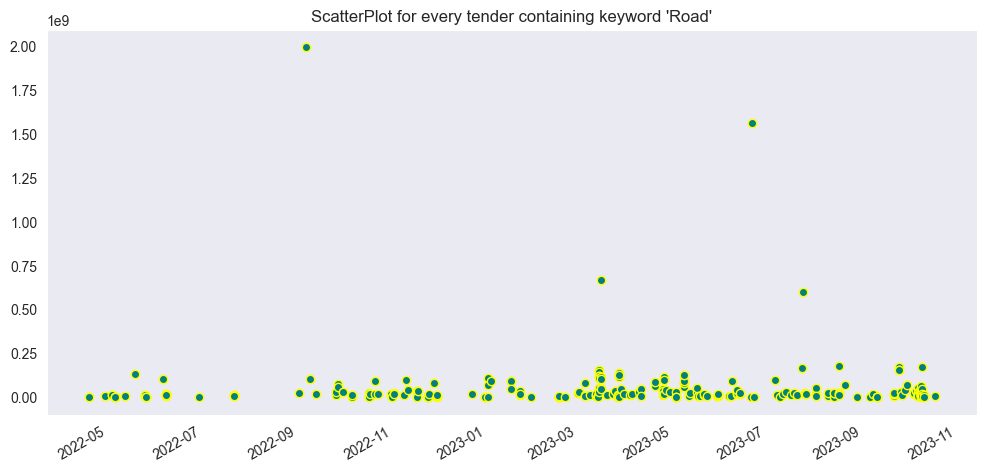

In [61]:
def date_v_amount_by_authority(string_value):
    df['Contract Date'] = pd.to_datetime(df['Contract Date'])
    plt.figure(figsize=(12,5))
    data = df[df['Authority'].str.contains(string_value)].sort_values(by='Contract Date')
    plt.scatter(data=data, x='Contract Date', y='numeric_amount', color='teal', edgecolors='yellow')
    plt.xticks(rotation=30, horizontalalignment='right')
    plt.title(f"ScatterPlot for every tender containing keyword '{string_value}'")
    plt.show()
date_v_amount_by_authority('Road')